#### Importing of Libraries
Here We imported the libraries needed for training, testing and exploring our dataset such as pandas, numpy, matplotlib, etc

In [ ]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000



### Data Columns

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```

## EDA
For this data set, the following exploratory analysis will be performed
- checking for null values
- checking the data type
- splitting into numerical and categorical data
- using a count plot to plot the categorical variables
- using histograms to plot the numerical variables

#### Loading the data
Using a function read_data, to retun the data and the shape of the data

In [57]:
def read_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This reads the csv file and loads the data in the dataframe"""
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of the data is: {data.shape}/n")
    return data


data = read_data(filename="salary.csv")
data.head()

Shape of the data is: (32560, 15)/n


,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Evaluating the datatypes


In [58]:
data.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

#### Checking for missing values


In [59]:
data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

No missing values

#### Creating for functions to create countplots and histograms

In [60]:
def plot_histogram(*, data: pd.DataFrame, feature: str) -> "Plot":
    """This returns a Seaborn Histogram."""
    sns.histplot(data=data, x=feature)
    plt.title(f"Distribution of {feature!r}", size=16)
    plt.tight_layout()
    plt.show()

In [61]:
#to create a countplot of features
def count_plot(*, data: pd.DataFrame, feat: str) -> "Plot":
    """to create a count plot of features"""
    sns.countplot(data=data, x=feat)
    plt.tick_params(axis='x', rotation=45)
    plt.title(f"Count plot of {feat!r}")
    plt.show
    
    data[feat]=data[feat].str.strip()
    return data[feat].value_counts(normalize=True).mul(100)

### Plotting Age

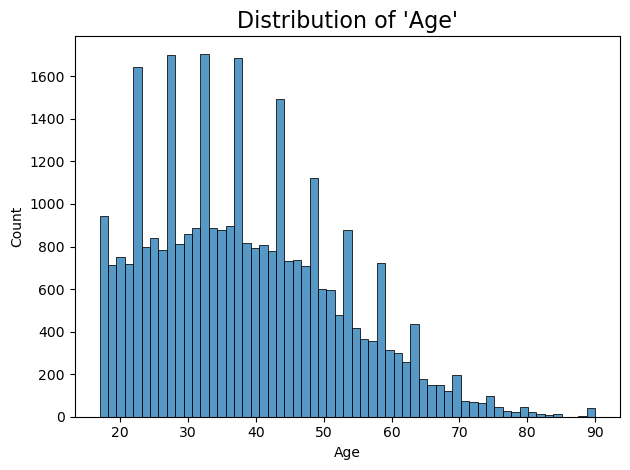

In [63]:
plot_histogram(data=data,feature='Age')

The plot is a little right skewed with most of the salary earners being between the age of 20 and 40

#### To count the number of unique values in age


In [64]:
data["Age"].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

#### splitting into numerical and categorical data


In [65]:
numerical_data= data.select_dtypes(include='number')
categorical_data= data.select_dtypes(exclude='number')

In [66]:
type(numerical_data)

pandas.core.frame.DataFrame

#### Plotting the features
 for each categorical variable, a count plot is generated along with the value counts

##### Workclass

Private             69.705160
Self-emp-not-inc     7.804054
Local-gov            6.428133
?                    5.638821
State-gov            3.983415
Self-emp-inc         3.427518
Federal-gov          2.948403
Without-pay          0.042998
Never-worked         0.021499
Name: Workclass, dtype: float64

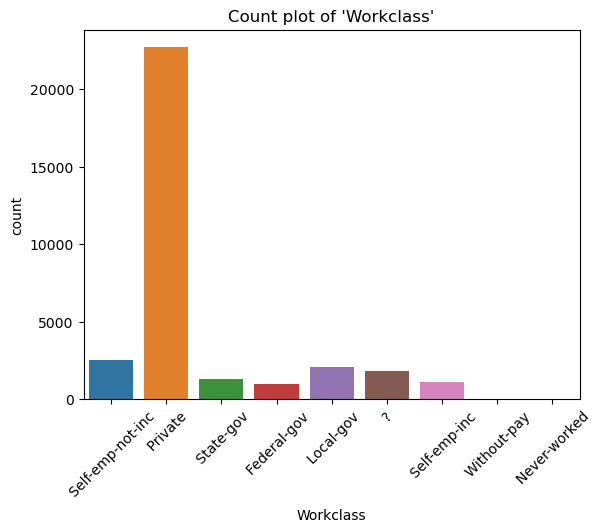

In [67]:
count_plot(data=data,feat='Workclass')

According to the data, the workclass has the highest percentage with the least being Never worked

In [68]:
data["Workclass"].value_counts(normalize=True).mul(100)

Private             69.705160
Self-emp-not-inc     7.804054
Local-gov            6.428133
?                    5.638821
State-gov            3.983415
Self-emp-inc         3.427518
Federal-gov          2.948403
Without-pay          0.042998
Never-worked         0.021499
Name: Workclass, dtype: float64

The workclass column seems to contain values lower 1%

##### BFinal Weight

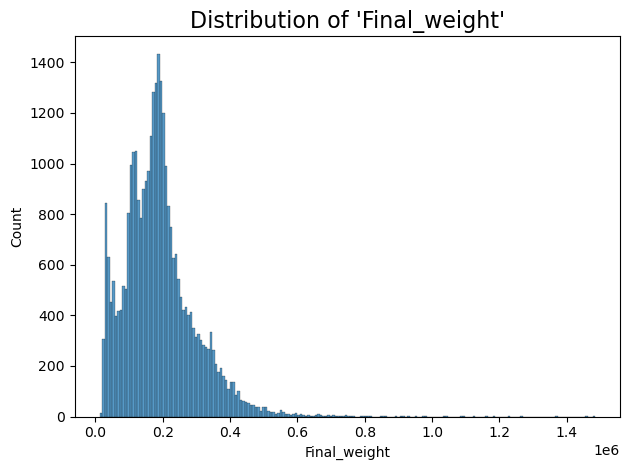

In [69]:
plot_histogram(data=data,feature='Final_weight')

With too amny outliers and too many values ,the Final weight column is right-skewed

##### Hours per week

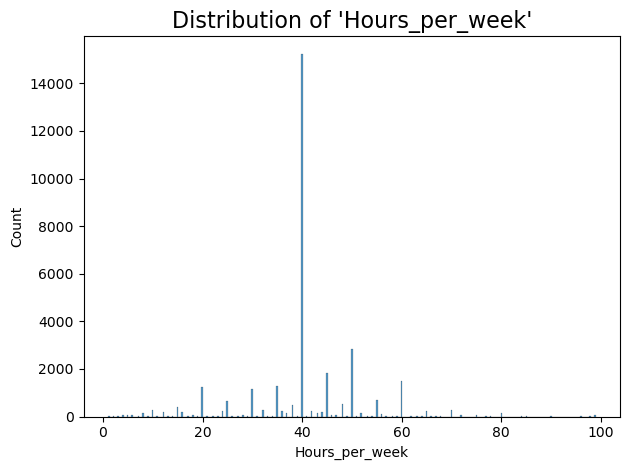

In [70]:
plot_histogram(data=data,feature='Hours_per_week')

The plot shows that the highest range of values lies between 40 and 50 hours

##### Education

HS-grad         32.251229
Some-college    22.392506
Bachelors       16.443489
Masters          5.291769
Assoc-voc        4.244472
11th             3.608722
Assoc-acdm       3.277027
10th             2.865479
7th-8th          1.984029
Prof-school      1.769042
9th              1.578624
12th             1.329853
Doctorate        1.268428
5th-6th          1.022727
1st-4th          0.515971
Preschool        0.156634
Name: Education, dtype: float64

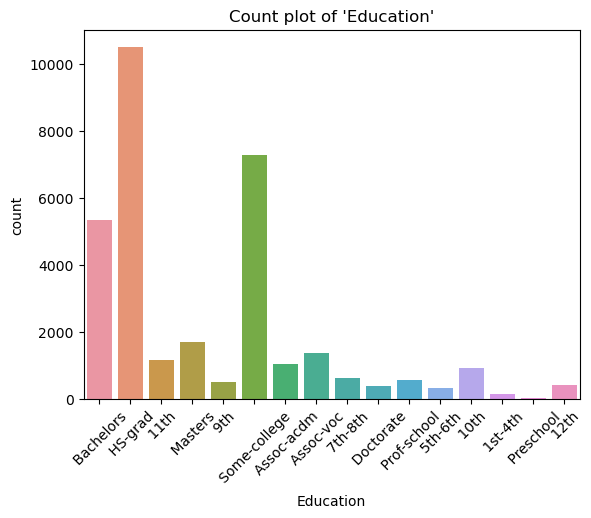

In [71]:
#countplot of education
count_plot(data=data,feat='Education')

 Most of the salary earners are high school graduates while the least only graduated from preschool

##### Marital status

Married-civ-spouse       45.995086
Never-married            32.807125
Divorced                 13.645577
Separated                 3.148034
Widowed                   3.049754
Married-spouse-absent     1.283784
Married-AF-spouse         0.070639
Name: Marital_status, dtype: float64

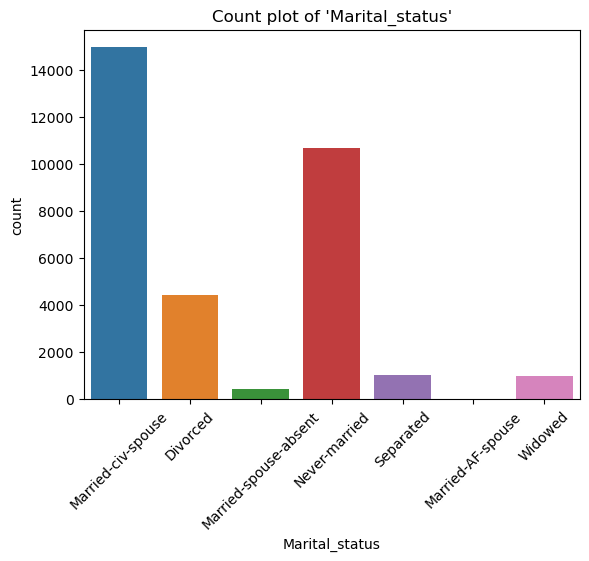

In [72]:
data['Marital_status']=data["Marital_status"].str.strip()
count_plot(data=data,feat='Marital_status')

A large percantage of the slary earneres have civillian spouses, followed those who have never married

##### Occupation

Prof-specialty       12.714988
Craft-repair         12.589066
Exec-managerial      12.487715
Adm-clerical         11.575553
Sales                11.210074
Other-service        10.119779
Machine-op-inspct     6.148649
?                     5.660319
Transport-moving      4.904791
Handlers-cleaners     4.207617
Farming-fishing       3.052826
Tech-support          2.850123
Protective-serv       1.993243
Priv-house-serv       0.457617
Armed-Forces          0.027641
Name: Occupation, dtype: float64

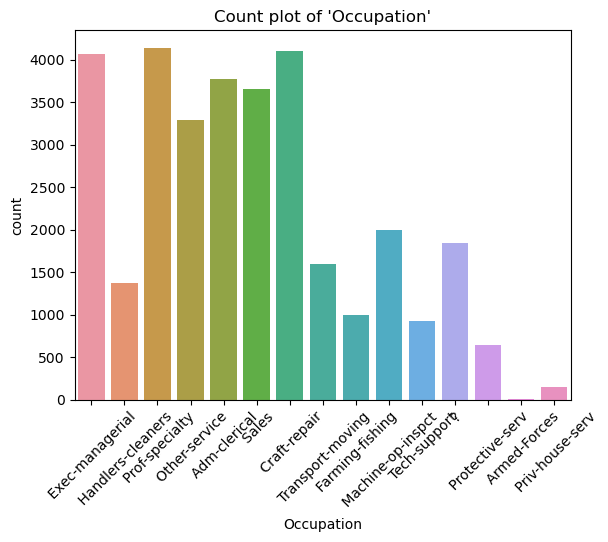

In [73]:
Salary_predictor = data.copy()
Salary_predictor['Occupation']=Salary_predictor["Occupation"].str.strip()
count_plot(data=data,feat='Occupation')

Executives and managerial offices are the highest values among the salary earner while those in the armed forces are the lowest

##### Relationship

Husband           40.519042
Not-in-family     25.503686
Own-child         15.565111
Unmarried         10.583538
Wife               4.815725
Other-relative     3.012899
Name: Relationship, dtype: float64

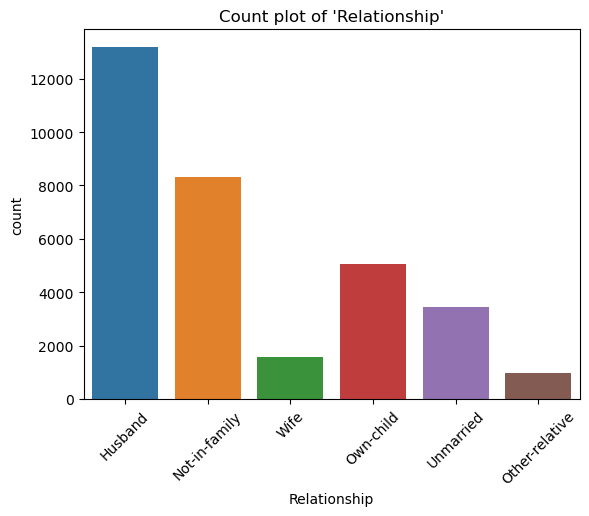

In [74]:
Salary_predictor['Relationship']=Salary_predictor["Relationship"].str.strip()
count_plot(data=Salary_predictor,feat='Relationship')

The most common relationshiop is husband while the least is other relative

##### Race

White                 85.426904
Black                  9.594595
Asian-Pac-Islander     3.191032
Amer-Indian-Eskimo     0.955160
Other                  0.832310
Name: Race, dtype: float64

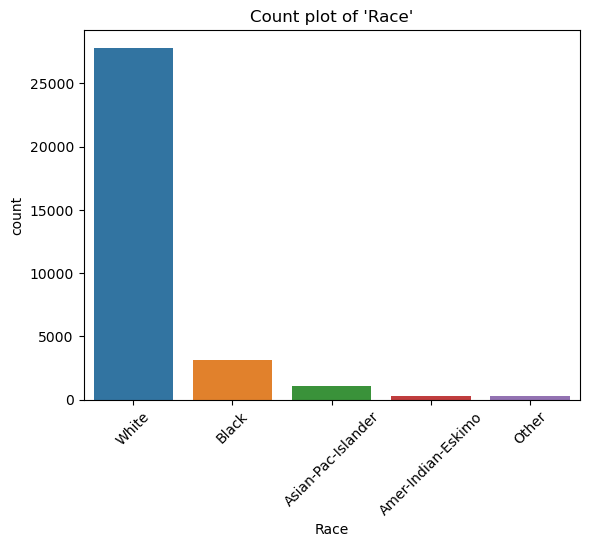

In [75]:
Salary_predictor['Race']=Salary_predictor["Race"].str.strip()
count_plot(data=Salary_predictor,feat='Race')

The most popular race of the recorded salary earners is white

##### Capital gain

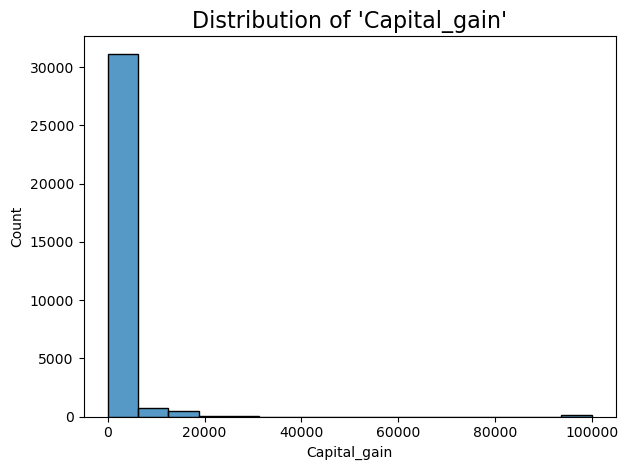

In [76]:
plot_histogram(data=Salary_predictor,feature='Capital_gain')

The capital gain column is not very useful as its mainly a ocnstant with only one outlier

##### Sex

Male      66.919533
Female    33.080467
Name: Sex, dtype: float64

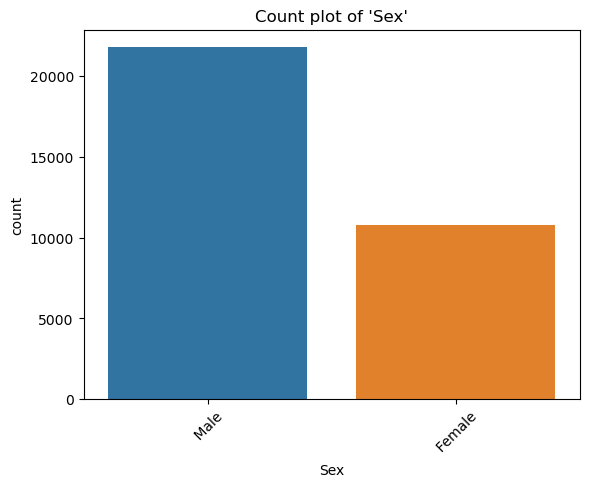

In [77]:
count_plot(data=Salary_predictor,feat='Sex')

66% of the salary earners are men while 34 % are women

##### Salary

United-States                 89.585381
Mexico                         1.974816
?                              1.790541
Philippines                    0.608108
Germany                        0.420762
Canada                         0.371622
Puerto-Rico                    0.350123
El-Salvador                    0.325553
India                          0.307125
Cuba                           0.291769
England                        0.276413
Jamaica                        0.248771
South                          0.245700
China                          0.230344
Italy                          0.224201
Dominican-Republic             0.214988
Vietnam                        0.205774
Guatemala                      0.196560
Japan                          0.190418
Poland                         0.184275
Columbia                       0.181204
Taiwan                         0.156634
Haiti                          0.135135
Iran                           0.132064
Portugal                       0.113636


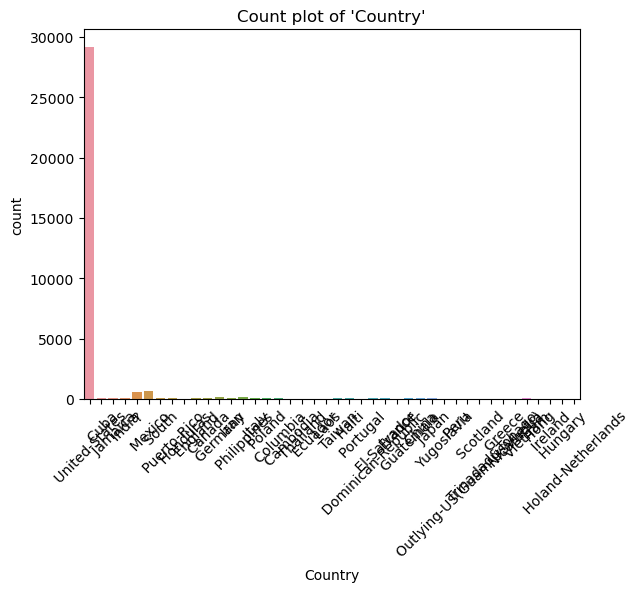

In [78]:
count_plot(data=Salary_predictor,feat='Country')

Close to 90% of the salary earners reside in USA

## Feature Engineering
Categorizing each of the categorical variables with functions. This done to minimize the number of values to train the model better. 

#### Categorizing Workclass

In [79]:
#replacing the smallest value and the unknown value with  in the Workclass column
divisor=[' ?',' Without-pay',' Never-worked']
data['Workclass'] = np.where(data['Workclass'].isin(divisor),' Other',data['Workclass'])

In [80]:
#verifying and stripping
data["Workclass"].value_counts(normalize=True).mul(100)
data['Workclass']=data["Workclass"].str.strip()
                                                   

#### Categorizing Education

In [81]:
data["Education"].value_counts(normalize=True).mul(100)


HS-grad         32.251229
Some-college    22.392506
Bachelors       16.443489
Masters          5.291769
Assoc-voc        4.244472
11th             3.608722
Assoc-acdm       3.277027
10th             2.865479
7th-8th          1.984029
Prof-school      1.769042
9th              1.578624
12th             1.329853
Doctorate        1.268428
5th-6th          1.022727
1st-4th          0.515971
Preschool        0.156634
Name: Education, dtype: float64

In [82]:
data["Education_num"].value_counts(normalize=True).mul(100)

9     32.251229
10    22.392506
13    16.443489
14     5.291769
11     4.244472
7      3.608722
12     3.277027
6      2.865479
4      1.984029
15     1.769042
5      1.578624
8      1.329853
16     1.268428
3      1.022727
2      0.515971
1      0.156634
Name: Education_num, dtype: float64

In [83]:

def categorize_education(Education_num):
    if Education_num in range(1,10):
        return 1
    elif Education_num in [10,11,12]:
        return 2
    elif Education_num in [13,14]:
        return 3
    elif Education_num in [15,16,17]:
        return 4
    else:
        return 5

Salary_pred = data.copy()
Salary_predictor['Education_num'] = Salary_predictor['Education_num'].apply(categorize_education)


In [84]:
Salary_predictor["Education_num"].value_counts(normalize=True).mul(100)


1    45.313268
2    29.914005
3    21.735258
4     3.037469
Name: Education_num, dtype: float64

#### Categorizing Marital Status

In [85]:


def categorize_mstatus(Marital_status):
    if Marital_status == 'Never-married':
        return 'Never married'
    elif Marital_status in ['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent']:
        return 'Married'
    else:
        return 'Other'

Salary_predictor['Marital_status'] = Salary_predictor['Marital_status'].apply(categorize_mstatus)


Married          47.349509
Never married    32.807125
Other            19.843366
Name: Marital_status, dtype: float64

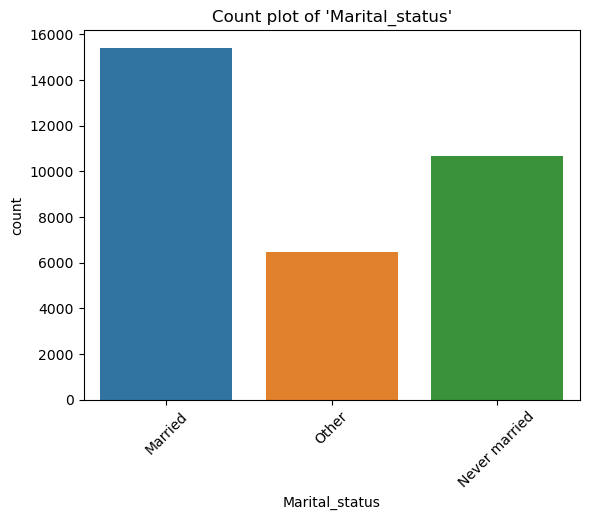

In [86]:
count_plot(data=Salary_predictor,feat='Marital_status')

#### Categorizing Occupation

In [87]:
Salary_predictor["Occupation"]= Salary_predictor["Occupation"].str.strip()
#to categorize occupation column
def categorize_occupation(Occupation):
    if Occupation in ['Exec-managerial']:
        return 'Management'
    elif Occupation in ['Sales']:
        return 'Sales and Marketing'
    elif Occupation in ['Adm-clerical']:
        return 'Administrative and Clerical'
    elif Occupation in ['Other-service', 'Priv-house-serv']:
        return 'Service'
    elif Occupation in ['Craft-repair']:
        return 'Craftsmanship'
    elif Occupation in ['Prof-specialty', 'Tech-support']:
        return 'Technical'
    elif Occupation in ['Transport-moving']:
        return 'Transportation and Logistics'
    elif Occupation in ['Farming-fishing']:
        return 'Agriculture and Fishing'
    elif Occupation in ['Machine-op-inspct', 'Handlers-cleaners']:
        return 'Blue-collar jobs'
    elif Occupation in ['Protective-serv', 'Armed-Forces']:
        return 'Protective Services'
    else:
        return 'unknown'

Salary_predictor['Occupation'] = Salary_predictor['Occupation'].apply(categorize_occupation)


Technical                       15.565111
Craftsmanship                   12.589066
Management                      12.487715
Administrative and Clerical     11.575553
Sales and Marketing             11.210074
Service                         10.577396
Blue-collar jobs                10.356265
unknown                          5.660319
Transportation and Logistics     4.904791
Agriculture and Fishing          3.052826
Protective Services              2.020885
Name: Occupation, dtype: float64

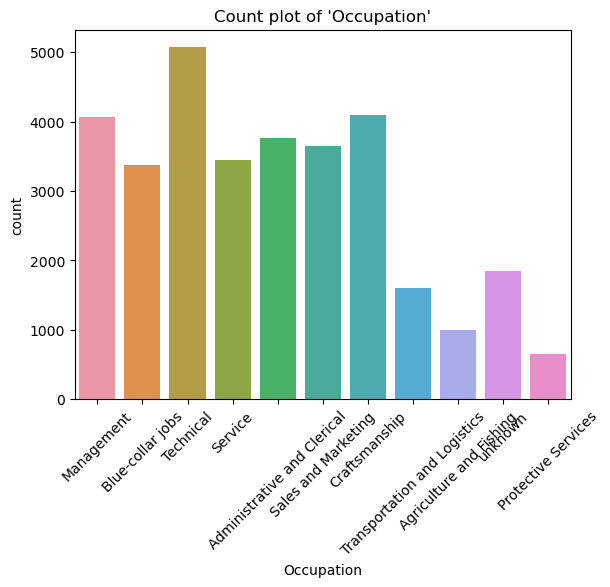

In [88]:
count_plot(data=Salary_predictor,feat='Occupation')

#### Categorizing Relationship

In [89]:
def categorize_fam(Relationship):
    if Relationship in ['Husband', 'Wife','Own-child']:
        return 'Immediate_family'
    elif Relationship in ['Other-relative']:
        return 'Distant_family'
    else:
        return 'Other'
    
Salary_predictor['Relationship'] = Salary_predictor['Relationship'].str.strip().apply(categorize_fam)


Immediate_family    60.899877
Other               36.087224
Distant_family       3.012899
Name: Relationship, dtype: float64

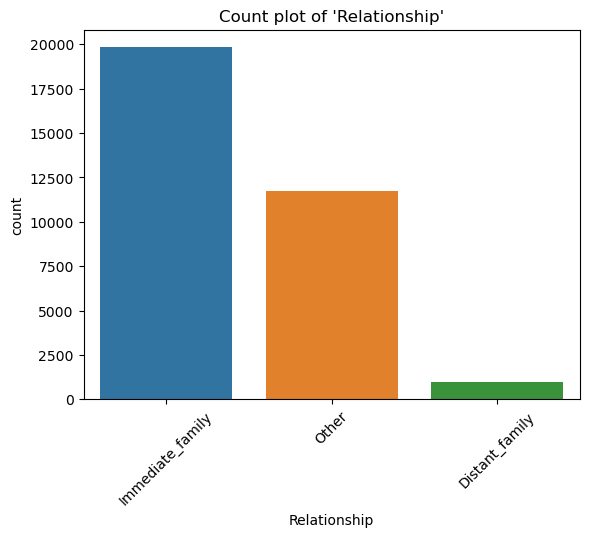

In [90]:
count_plot(data=Salary_predictor,feat='Relationship')

#### Categorizing Race

In [91]:
other_races = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Other']

Salary_predictor['Race']= Salary_predictor['Race'].str.strip()
Salary_predictor['Race'] = np.where(Salary_predictor['Race'].isin(other_races), 'Other', Salary_predictor['Race'])


White    85.426904
Black     9.594595
Other     4.978501
Name: Race, dtype: float64

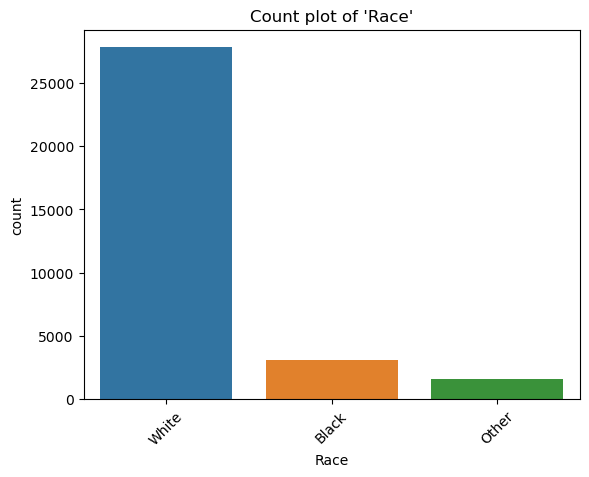

In [92]:
count_plot(data=Salary_predictor,feat='Race')

In [93]:
Salary_predictor['Capital_gain'].describe()

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_gain, dtype: float64

In [94]:
Salary_predictor.head()


,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,3,Married,Management,Immediate_family,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,1,Other,Blue-collar jobs,Other,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,1,Married,Blue-collar jobs,Immediate_family,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,3,Married,Technical,Immediate_family,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,3,Married,Management,Immediate_family,White,Female,0,0,40,United-States,<=50K


#### Categorizing Country

In [95]:
#categorizing the country column
Salary_predictor['Country']= Salary_predictor['Country'].str.strip()
Salary_predictor['Country'] = np.where(Salary_predictor['Country']=='United-States', 'United-States','Other')

United-States    89.585381
Other            10.414619
Name: Country, dtype: float64

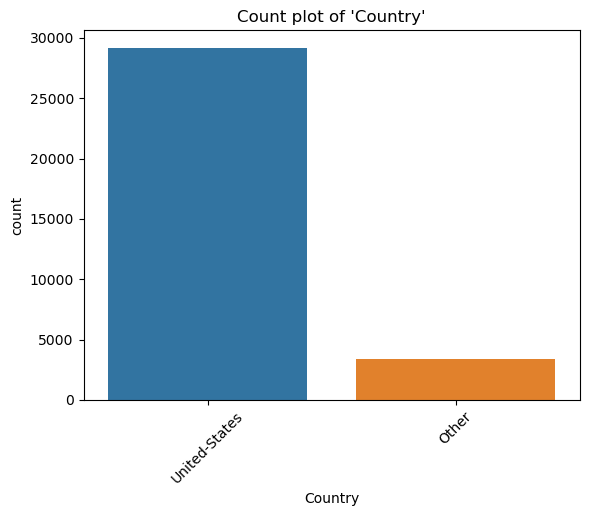

In [96]:
count_plot(data=Salary_predictor,feat='Country')

#### Discretizing the numerical variables
We discretize the numerical variables in order to reduce the numerical values to tain the machine model better. We create a function to discretize the features

In [102]:
#creating a function to discretize the numerical continous variables
from typing import Union, Optional, Sequence
def discretize_feature(
    *, data: pd.DataFrame, feature: str, num_bins: int,labels: list[Union[str, int]]) -> pd.Series:
    """This is used to discretize a feature using equal frequency discretization."""


    data[f"{feature}_binned"] = pd.qcut(
        x=data[feature],labels=labels, q=num_bins, duplicates="drop"
    )

    return data[f"{feature}_binned"]

In [103]:
#discretizing the age variable into 8 bins
discretize_feature(data=Salary_predictor, feature='Age',num_bins=8,labels=False).value_counts()

0    4772
3    4393
5    4216
1    4126
4    4024
6    3916
7    3723
2    3390
Name: Age_binned, dtype: int64

In [104]:
#hours per week
Salary_predictor['Hours_per_week'].value_counts().sort_index()

1        20
2        32
3        39
4        54
5        60
6        64
7        26
8       145
9        18
10      278
11       11
12      173
13       23
14       34
15      404
16      205
17       29
18       75
19       14
20     1224
21       24
22       44
23       21
24      252
25      674
26       30
27       30
28       86
29        7
30     1149
31        5
32      266
33       39
34       28
35     1297
36      220
37      149
38      476
39       38
40    15216
41       36
42      219
43      151
44      212
45     1824
46       82
47       49
48      517
49       29
50     2819
51       13
52      138
53       25
54       41
55      694
56       97
57       17
58       28
59        5
60     1475
61        2
62       18
63       10
64       14
65      244
66       17
67        4
68       12
70      291
72       71
73        2
74        1
75       66
76        3
77        6
78        8
80      133
81        3
82        1
84       45
85       13
86        2
87        1
88  

In [105]:
#discretizing the Hours_per_week column
discretize_feature(data=Salary_predictor, feature='Hours_per_week',num_bins=10,labels=False).value_counts(normalize=True).mul(100)

2    49.444103
4    11.544840
1    11.090295
0    10.039926
3     9.490172
5     8.390663
Name: Hours_per_week_binned, dtype: float64

In [106]:
#value counts of the final weight columns
Salary_predictor['Final_weight'].value_counts().sort_index()

12285      1
13769      1
14878      1
18827      1
19214      1
          ..
1226583    1
1268339    1
1366120    1
1455435    1
1484705    1
Name: Final_weight, Length: 21647, dtype: int64

In [107]:
#discretizing the final weight into 10 bins
discretize_feature(data=Salary_predictor, feature='Final_weight',num_bins=10,labels=False).value_counts().sort_index()

0    3256
1    3256
2    3257
3    3255
4    3256
5    3256
6    3256
7    3256
8    3256
9    3256
Name: Final_weight_binned, dtype: int64

In [108]:
Salary_predictor.head(2)

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Age_binned,Hours_per_week_binned,Final_weight_binned
0,50,Self-emp-not-inc,83311,Bachelors,3,Married,Management,Immediate_family,White,Male,0,0,13,United-States,<=50K,6,0,1
1,38,Private,215646,HS-grad,1,Other,Blue-collar jobs,Other,White,Male,0,0,40,United-States,<=50K,4,2,6


#### DroppingSome columns 
It is necessary to drop columns that have two many constants , are not encoded or have already beeen discretized


In [109]:
#dropping capital_gain,education and capital_loss columns
Salary_predictor = Salary_predictor.drop(columns=['Education','Capital_gain','Capital_loss'])


In [110]:
Salary_predictor=Salary_predictor.drop(columns=['Age','Final_weight','Hours_per_week'])

#### Encoding the Salary Column

In [111]:
#value counts of the salary column
Salary_predictor['Salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: Salary, dtype: int64

In [112]:
#encoding the salary column
Salary_predictor['Salary']= Salary_predictor['Salary'].str.strip()
Salary_predictor['Salary'] = np.where(Salary_predictor['Salary']=='<=50K',0,1)

#### Logistic Regression model

##### Splitting into test and train

In [115]:
#splitting the data into traing and test
from sklearn.model_selection import train_test_split

y=Salary_predictor['Salary']
X=Salary_predictor.drop(columns='Salary')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

X_train.shape, X_test.shape

((26048, 11), (6512, 11))

##### Fitting and Transforming
transforming the columns with column transformer, we one hot encode the categorical variables

In [116]:
#using pipeline to transform and encode the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#instantating
ohe= OneHotEncoder(dtype=int, handle_unknown="ignore")

to_encode = ['Workclass','Marital_status','Occupation','Relationship','Sex','Race','Country']
col_trans = ColumnTransformer(transformers=[('ohe',ohe,to_encode)],remainder='passthrough',)

col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Marital_status', 'Occupation',
                                  'Relationship', 'Sex', 'Race', 'Country'])])

In [117]:
X_train.dtypes

Workclass                object
Education_num             int64
Marital_status           object
Occupation               object
Relationship             object
Race                     object
Sex                      object
Country                  object
Age_binned                int64
Hours_per_week_binned     int64
Final_weight_binned       int64
dtype: object

#### Perforimg logistic regression using pipelines
Using pipelines, we apply the process of columns transfomer and logistic regression

In [118]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#instantiate
logit = LogisticRegression(max_iter=1000)

RPipe = Pipeline(steps =[
    #========column transfomer=======
    ('col_trans',col_trans),
    #==========lostic regression======
    ('logit',logit),
])

RPipe

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Sex', 'Race',
                                                   'Country'])])),
                ('logit', LogisticRegression(max_iter=1000))])

In [119]:
#fitting the model
RPipe.fit(X_train,y_train)

#predict
ypred = RPipe.predict(X_test)



In [120]:
np.mean(y_test == ypred)

0.8363022113022113

#### Classification report for logistic regression


In [121]:
regress_report= metrics.classification_report(y_true=y_test,y_pred=ypred)
print(regress_report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4970
           1       0.69      0.56      0.62      1542

    accuracy                           0.84      6512
   macro avg       0.78      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



In [123]:
precision_log = metrics.precision_score(
    y_test, ypred, average="macro", zero_division=0
)

print("Precision:", precision_log)

Precision: 0.781181557590717


The logistic regression model has a precision score of 0.78 and an accuracy of 0.84

#### function for creating confusion matrix
Creating a confusion matrix to view false positives and negatives

In [125]:
def confusion_matrix(*,y_true, y_pred,  title:str):
    conf_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

    disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix
    )
    # Display Confusion Matix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for:{title}", size=15)
    plt.show()


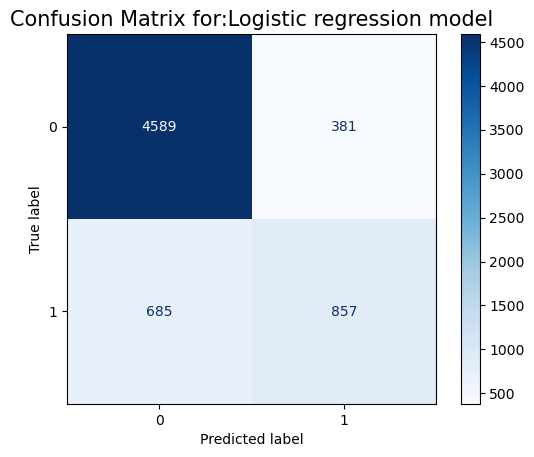

In [126]:
#confusion matrix for logistic regression model
confusion_matrix(y_true=y_test,y_pred=ypred, title='Logistic regression model')

In [127]:
#roc score for logistic regression model
log_r_roc_score =metrics.roc_auc_score(y_true=y_test,y_score=ypred)
log_r_roc_score

0.7395558826369371

The regression model ha an accuracy of 0.84 and a roc_auc_score of 0.74. This is the model to be used to check for new data

#### Decision Tree Classifier
we create a pipeline applying column transformer and a decision tree classifier

In [128]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

classpipe = Pipeline( steps =[
                     #========column transformer=======
                      ('col_trans',col_trans),
                    #==========lostic regression======
                    ('clf',clf),
])

classpipe

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Sex', 'Race',
                                                   'Country'])])),
                ('clf', DecisionTreeClassifier())])

##### Fit and training

In [129]:
#fit
classpipe.fit(X_train,y_train)

#predict
y_pred_clf=classpipe.predict(X_test)

##### Classification report

In [130]:
clf_regress_report= metrics.classification_report(y_true=y_test,y_pred=y_pred_clf)
print(clf_regress_report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4970
           1       0.56      0.53      0.55      1542

    accuracy                           0.79      6512
   macro avg       0.71      0.70      0.70      6512
weighted avg       0.79      0.79      0.79      6512



In [ ]:
confusion_matrix(y_true=y_test,y_pred=y_pred_clf, title='Decision Tree Classifier')

In [ ]:
clf_roc_score =metrics.roc_auc_score(y_true=y_test,y_score=y_pred_clf)
clf_roc_score

The classification model ha an accuracy of 0.79 and a roc_auc_score of 0.8. This is the not the model to be used to predict new data

##### Conclusion: The logistic regression model is the best to predict the salary score for any new data that needs to be inputed